# Q1. What is the purpose of grid search cv in machine learning, and how does it work?

GridSearchCV (Grid Search Cross-Validation) is a technique used in machine learning to systematically search for the optimal combination of hyperparameters for a given model. Hyperparameters are the parameters that are set before the learning process begins and cannot be learned from the data itself. They can significantly impact a model's performance and generalization ability. The purpose of GridSearchCV is to automate the process of finding the best set of hyperparameters to maximize a certain performance metric, such as accuracy, precision, recall, or F1 score.

### how GridSearchCV works:

**1.Parameter Space Definition:** GridSearchCV requires you to define a set of hyperparameters and their potential values. These hyperparameters can include things like learning rate, number of trees in a random forest, regularization strength, etc.

**2.Search Strategy:** GridSearchCV then creates a grid of all possible combinations of hyperparameter values. For example, if you have two hyperparameters, A and B, with two potential values each, the grid might look like this:

A: [a1, a2]

B: [b1, b2]

This would result in four combinations: (a1, b1), (a1, b2), (a2, b1), and (a2, b2).

**3.Model Evaluation:** For each combination of hyperparameters, GridSearchCV trains a new model using the training data and the specified hyperparameter values. Then, it evaluates the model's performance using a chosen cross-validation strategy (such as k-fold cross-validation) on the validation data. The performance metric (like accuracy) is calculated for each fold.

**4.Performance Comparison:** After evaluating all the combinations of hyperparameters, GridSearchCV identifies the combination that yielded the best performance on average across the different folds. This best combination is based on the performance metric you've chosen (e.g., highest accuracy).

**5.Best Model:** Once the best combination of hyperparameters is determined, GridSearchCV retrains the model using the entire training dataset and these optimal hyperparameters to create the final model.

# Q2. Describe the difference between grid search cv and randomize search cv, and when might you choose one over the other?

GridSearchCV and RandomizedSearchCV are both techniques used for hyperparameter tuning in machine learning, but they differ in how they explore the hyperparameter space. Here's a comparison of the two and when you might choose one over the other:

### GridSearchCV:

*    **Search Strategy:** GridSearchCV performs an exhaustive search over all possible combinations of hyperparameter values defined in a grid. It evaluates the model's performance for every combination.
*    **Combinations Considered:** It considers all possible combinations of hyperparameters and their values, which can be time-consuming and computationally expensive, especially when dealing with a large number of hyperparameters and values.
*    **Advantages:** GridSearchCV ensures a thorough exploration of the hyperparameter space and guarantees that the best combination will be found if it's present in the predefined grid.
*    **Disadvantages:** Due to its exhaustive nature, GridSearchCV can be very slow when the hyperparameter space is large. It may also be inefficient if only a few hyperparameters significantly affect the model's performance.

### RandomizedSearchCV:

*    **Search Strategy:** RandomizedSearchCV, as the name suggests, performs a randomized search over a specified hyperparameter distribution. It samples a certain number of combinations randomly from the hyperparameter space and evaluates their performance.
*   **Combinations Considered:** It considers a random subset of the hyperparameter space, which can make it much faster and computationally efficient compared to GridSearchCV.
*    **Advantages:** RandomizedSearchCV is more suitable when the hyperparameter space is large or when you have limited computational resources. It offers a good chance of finding a decent set of hyperparameters without exploring every single combination.
*    **Disadvantages:** Since it's a random sampling approach, there's a chance that the best combination might not be sampled during the search. However, the randomness is usually mitigated by the large number of combinations sampled.

### Choosing Between GridSearchCV and RandomizedSearchCV:

*    Use **GridSearchCV** when you have a small hyperparameter space and want to ensure that you explore every possible combination thoroughly. It's also suitable when you have a reasonable amount of computational resources and time.
*    Use **RandomizedSearchCV** when the hyperparameter space is large, and an exhaustive search would be too time-consuming. It's also a good choice when you want to get a rough idea of the optimal hyperparameters quickly.

In general, if computational resources and time are not a concern, GridSearchCV is a safe and exhaustive option. However, if you need to balance the trade-off between exploration of the hyperparameter space and computational efficiency, RandomizedSearchCV can be a more practical choice.

# Q3. What is data leakage, and why is it a problem in machine learning? Provide an example.

**Data leakage** refers to a mistake in the process of preparing data and building machine learning models where information from the test set inadvertently influences the training process. When this occurs, the performance metrics obtained post-training (like accuracy or mean squared error) can be overly optimistic and not representative of the model's true performance on unseen data.

Data leakage is a problem because:

**1.    Misleading Results:** As mentioned, the model can appear to perform better than it actually does, which can lead to incorrect conclusions.

**2.    Overfitting:** The model may fit noise or incidental patterns from the test set, which would not generalize to other unseen data.

**3.    Wasted Resources:** If data leakage goes unnoticed, time and resources can be wasted on deploying a model that doesn't perform as expected in real-world scenarios.

### Example: Credit Card Fraud Detection

Suppose you're working on a credit card fraud detection model, and you have a dataset with information about transactions, including features like transaction amount, location, and the cardholder's age. The target variable indicates whether a transaction is fraudulent (1) or not (0).

Now, let's consider two scenarios:

**1.    Leakage Scenario:** In this scenario, you accidentally include the transaction timestamp as a feature in the dataset. During model training, the model learns that transactions occurring at specific times of day are more likely to be fraudulent. However, this information would not be available in real-world situations when the model is deployed. The model is essentially learning from future information (timestamps) that it shouldn't have access to during training. As a result, the model appears to perform very well on the training data, but it won't generalize to new transactions without timestamps.

**2.    Non-Leakage Scenario:** In this scenario, you exclude the transaction timestamp from the dataset and only use features that would be available at the time of making a prediction. The model is trained solely on features like transaction amount, location, and cardholder's age. This approach ensures that the model is learning from the right set of features and that its performance on new, unseen transactions is a better indicator of its generalization ability.

In the leakage scenario, the model would seem to have excellent performance during training, but it would fail to detect fraud accurately on new transactions because it has learned patterns that are not representative of real-world data.

# Q4. How can you prevent data leakage when building a machine learning model?

Preventing data leakage is crucial to ensure that a machine learning model generalizes well to unseen data. Here are several strategies to prevent data leakage when building a machine learning model:

### 1. Careful Data Splitting:

*    **Hold-Out Sets:** Split your dataset into separate training and test sets before any preprocessing or feature engineering. Only use the test set for validation after the model has been trained.
*    **Cross-Validation:** For systematic validation, use techniques like k-fold cross-validation. However, ensure that any data preprocessing or feature extraction is done within each fold separately.

### 2. Temporal Consistency:

*    For time-series data or data with a temporal component, always ensure that the training set precedes the validation/test set in time to prevent future information from leaking into the past.

### 3. Temporal Consistency:

*    For time-series data or data with a temporal component, always ensure that the training set precedes the validation/test set in time to prevent future information from leaking into the past.

### 4. Data Preprocessing:

*    Perform data scaling, normalization, and other preprocessing steps separately on the training and test sets. This means, for example, if you're standardizing a feature, you should calculate the mean and standard deviation on the training set only, then apply these values to both the training and test sets.

### 5. Feature Extraction and Selection:

*    Any feature extraction or selection should be done based on the training data only. This includes operations like principal component analysis (PCA) or selecting the top-k important features.

### 6. External Data Sources:

*    If using external data sources to augment your dataset, ensure they don't introduce future information or have any overlap with your target variable.

### 7. Target Encoding:

*    If applying target encoding or any encoding technique that relies on the target variable, make sure to calculate the encoding values using the training data only.

### 8. Pipeline Construction:

*    Utilize pipelines (e.g., using 'Pipeline' in scikit-learn) to streamline the workflow and ensure that preprocessing steps are applied consistently to both training and validation/test data.
    
### 9. Regularization:

*    Regularization techniques (like L1 or L2 regularization) can help in preventing overfitting which, while not data leakage per se, is a related issue where the model fits too closely to the training data.

### 10. Review Data Sources and Features:

*    Periodically review the sources and nature of your features. Ensure that no feature unintentionally carries information about the target.

### 11. Collaboration and Peer Review:

*    Have team members or peers review the modeling process. Sometimes, a fresh pair of eyes can catch leakage issues that might be overlooked by the original developer. 

### 12.  Unit Tests and Monitoring:

*    Implement unit tests for your data processing and modeling steps to catch any unexpected behaviors. After deploying the model, monitor its performance regularly. A sudden spike in performance could be a sign of leakage.

# Q5. What is a confusion matrix, and what does it tell you about the performance of a classification model?

A confusion matrix is a table used in classification to evaluate the performance of a machine learning model. It provides a summary of the predictions made by the model against the actual ground truth labels. A confusion matrix breaks down the predictions into four categories based on the actual and predicted class labels:

*    **True Positive (TP):** The model correctly predicted a positive class instance as positive.
*    **True Negative (TN):** The model correctly predicted a negative class instance as negative.
*    **False Positive (FP):** The model incorrectly predicted a negative class instance as positive (Type I error).
*    **False Negative (FN):** The model incorrectly predicted a positive class instance as negative (Type II error).

a visual representation of a confusion matrix:

From the confusion matrix, various metrics can be calculated to assess the performance of a classification model:

**1.    Accuracy:** Measures the overall correctness of the predictions: (TP + TN) / (TP + TN + FP + FN).

**2.    Precision:** Also called Positive Predictive Value (PPV), it measures the proportion of correctly predicted positive instances among all instances predicted as positive: TP / (TP + FP).

**3.    Recall:** Also called Sensitivity, Hit Rate, or True Positive Rate (TPR), it measures the proportion of correctly predicted positive instances among all actual positive instances: TP / (TP + FN).

**4.    Specificity:** Also called True Negative Rate (TNR), it measures the proportion of correctly predicted negative instances among all actual negative instances: TN / (TN + FP).

**5.    F1 Score:** A harmonic mean of precision and recall, providing a balance between the two metrics: 2 * (Precision * Recall) / (Precision + Recall).

**6.    False Positive Rate (FPR):** Measures the proportion of actual negative instances that were incorrectly predicted as positive: FP / (FP + TN).

**7.    False Negative Rate (FNR):** Measures the proportion of actual positive instances that were incorrectly predicted as negative: FN / (TP + FN).

Confusion matrices are particularly useful when dealing with imbalanced datasets, where one class might dominate the other. They provide a detailed view of a model's performance, helping you understand where it excels and where it struggles. Depending on the problem's context, you might prioritize different metrics. For example, in medical diagnosis, high recall might be more important to avoid missing positive cases (minimize false negatives), while in email spam detection, high precision could be emphasized to avoid false positives

# Q6. Explain the difference between precision and recall in the context of a confusion matrix.

In the context of a confusion matrix, precision and recall are two key metrics that provide insights into the performance of a classification model, particularly its accuracy with respect to positive predictions and its completeness in identifying all positive instances.

Here's a breakdown of the difference between precision and recall:

**1.Definition:**

*    **Precision:** Refers to the proportion of positive identifications (predictions) that were actually correct. It is the ability of the classifier not to label a negative sample as positive.

*    **Recall (also known as Sensitivity or True Positive Rate):** Refers to the proportion of actual positives (true positive instances) that were identified correctly by the model. It is the ability of the classifier to find all the positive samples.

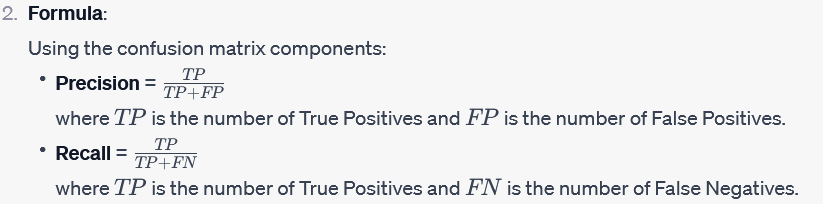

**Interpretation:**

*    **Precision:** Out of all the instances that the model predicted as positive, how many of them were actually positive? A high precision means that false positive errors are low.

*    **Recall:** Out of all the actual positive instances, how many of them were predicted by the model as positive? A high recall means that false negative errors are low.

**Trade-off:**

Often, there's a trade-off between precision and recall. Improving precision might reduce recall, and vice versa. The nature of some problems might require optimizing for one metric over the other. For instance:

*    In a medical diagnosis scenario, having a high recall might be more critical because missing a positive case (like a disease) can have serious consequences, even if it means having some false positives that will be ruled out in subsequent tests (lower precision).

*    In a spam email filter, high precision is essential to ensure that non-spam emails (important emails) aren't mistakenly classified as spam, even if it means letting a few spam emails slip through (slightly lower recall).

**Use Cases:**

*    Precision is crucial when the cost of false positives is high. For instance, in a legal setting, wrongly predicting someone as guilty (when they are innocent) is very costly.

*    Recall is crucial when the cost of false negatives is high. For example, in medical tests, failing to identify a serious disease can be life-threatening.

In summary, while both precision and recall provide insights into the model's performance regarding positive instances, precision focuses on the accuracy of positive predictions, and recall focuses on the completeness of identifying all positive instances.

# Q7. How can you interpret a confusion matrix to determine which types of errors your model is making?

Interpreting a confusion matrix allows you to understand the types of errors your model is making. Let's first recall the structure of a confusion matrix for binary classification:

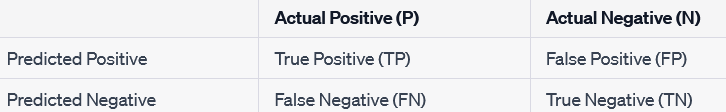

### how to interpret the matrix to determine the types of errors:

**1.    True Positives (TP):**
*  These are correctly predicted positive values. It means that the actual class was positive, and the model also predicted it as positive.

**2.    True Negatives (TN):**
*  These are correctly predicted negative values. The actual class was negative, and the model also predicted it as negative.

**3.    False Positives (FP):**
*  These are instances that the model incorrectly predicted as positive when they were actually negative. This type of error is also known as a "Type I error" or "False Alarm".
*  If you have a high number of FPs, your model has a tendency to predict positive results more often than it should.

**4.    False Negatives (FN):**
*  These are instances where the model predicted the negative class, but the actual outcome was positive. This is also known as a "Type II error" or "Miss".
*  If you have a high number of FNs, your model is missing positive instances, meaning it's conservative in predicting positive outcomes.

### To determine which types of errors your model is making:

*    **Look at FP and FN values:**
*  If FP is high, the model is being overly aggressive in predicting positives, which could mean many instances are being incorrectly classified as positive.
*  If FN is high, the model is being overly conservative in its predictions, missing many actual positive instances.

*    **Consider the Context:**
*   Depending on the application, one type of error might be more costly than the other. For example, in medical diagnostics, an FN (not diagnosing a sick person) might be more severe than an FP (diagnosing a healthy person as sick). In contrast, for a spam email detector, an FP (marking a good email as spam) might be viewed as more problematic than an FN (letting a spam email through).

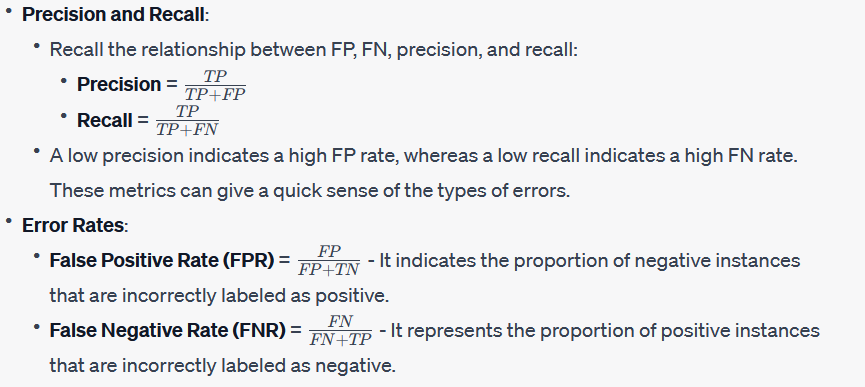

# Q8. What are some common metrics that can be derived from a confusion matrix, and how are they calculated?

Several metrics can be derived from a confusion matrix, each providing different insights into the performance of a classification model. Here are some of the most common metrics for a binary classification problem:

**10. Accuracy:**

*    Represents the proportion of predictions that the model got right.
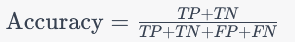

**2. Precision (Positive Predictive Value):**

*    Measures the accuracy of the positive predictions.
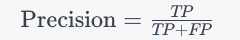

**3. Recall (Sensitivity, True Positive Rate):**

*    Measures the proportion of actual positives that were identified correctly.
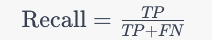

**4. Specificity (True Negative Rate):**

*    Measures the proportion of actual negatives that were identified correctly.
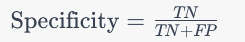

**5. F1-Score:**

*    The harmonic mean of precision and recall. It gives a balance between the two metrics and is especially useful when the class distribution is unbalanced.
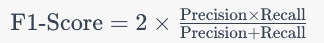

**6. False Positive Rate (FPR):**

*    Represents the proportion of actual negatives that the model incorrectly classified as positive.
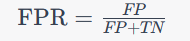

**7. False Negative Rate (FNR):**

*    Represents the proportion of actual positives that the model incorrectly classified as negative.
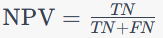

**8. Negative Predictive Value (NPV):**

*    Measures the accuracy of the negative predictions.
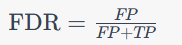

**9. False Discovery Rate (FDR):**

*    Represents the proportion of positive predictions that were false.
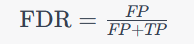

**10.Matthews Correlation Coefficient (MCC):**

*    A metric that provides a balanced measure of binary classification performance, considering all values in the confusion matrix. It returns a value between -1 (worst) and +1 (best), with 0 indicating random performance.
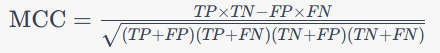

# Q9. What is the relationship between the accuracy of a model and the values in its confusion matrix?

Where:
    
* TP = True Positives

* TN = True Negatives

* FP = False Positives

* FN = False Negative

**The formula for accuracy using the values from the confusion matrix is:**
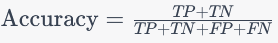

**From the formula, we can make the following observations about the relationship between accuracy and the confusion matrix:**

**1. Influence of Correct Predictions:** Both TP and TN contribute positively to the accuracy, as they represent correct predictions.

**2. Influence of Incorrect Predictions:** Both FP and FN are in the denominator, meaning that as these values increase (indicating more mistakes), the accuracy will decrease.

**3. 100% Accuracy:** If the model makes no mistakes, meaning FP=0 and FN = 0, then the accuracy becomes 1 or 100%.

**4. 0% Accuracy**: In the unlikely and worst-case scenario where every prediction is wrong (i.e., TP=0 and TN=0), the accuracy would be 0 or 0%.

**5. Not Always the Best Metric:** While accuracy provides an overall measure of the model's performance, it can be misleading, especially if the classes are imbalanced. In cases where one class significantly outnumbers the other, a model could achieve high accuracy by simply predicting the majority class every time, even if it fails to correctly classify any instances of the minority class.

# Q10. How can you use a confusion matrix to identify potential biases or limitations in your machine learning model?

A confusion matrix provides a detailed breakdown of a model's predictions across different classes, making it a valuable tool to identify potential biases or limitations.how you can use it to spot such issues:

### 1.Class Imbalance:

*    If one class has significantly more instances than another in your dataset, the model might over-predict the majority class, leading to a high number of false positives or false negatives for the minority class.
*    Check if the number of true positives and true negatives for the minority class is disproportionately low. If the model is consistently failing to predict the minority class, it indicates bias.

### 2.Low Recall for a Particular Class:

*    If the recall (or true positive rate) for a particular class is low, the model has difficulty recognizing instances of that class and often misses them.
*    It could indicate that the model might be biased against this class or that the features used aren't effective for distinguishing it.

### 3.Low Precision for a Particular Class:

*    Low precision indicates that many instances predicted as belonging to a particular class don't actually belong to it.
*    This could suggest that the model is over-eager in predicting this class, possibly due to biases in the training data or ineffective features.

### 4.High False Positive or False Negative Rates for Sensitive Groups:

*    If you're working with data that includes sensitive attributes (e.g., gender, ethnicity), you can create confusion matrices for different subgroups to check for disparities.
*    A significantly higher false positive or false negative rate for one group compared to others may indicate biases in the model or the training data.

### 5.Overfitting to Training Data:

*    By comparing confusion matrices on both training and validation/test datasets, you can identify potential overfitting.
*    If the model performs exceptionally well on the training data but poorly on the validation/test data, it might be overfitting to the noise or specificities of the training set.

### 6.Data Collection Biases:

*    If your data collection process is biased, it will be reflected in the model's predictions. For instance, if certain classes or outcomes are underrepresented, the model might struggle to predict them correctly.
*    Regularly revisiting and analyzing the confusion matrix, especially after adding new data or changing the data collection process, can help identify such biases.

### 7.Feature Limitations:

*    If the model consistently struggles with specific classes (as evidenced by poor recall or precision for those classes), the features being used might not carry enough information to distinguish them effectively.
*    This can prompt a deeper dive into feature engineering or the consideration of additional data sources.